Libraries

In [2]:
#limporting libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

Load the data

In [40]:
#loading the data
avocado_df = pd.read_csv('avocado.csv')

Exploring the data

In [41]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado_df.shape

(18249, 14)

In [9]:
#sorting Date column
avocado_df = avocado_df.sort_values("Date")

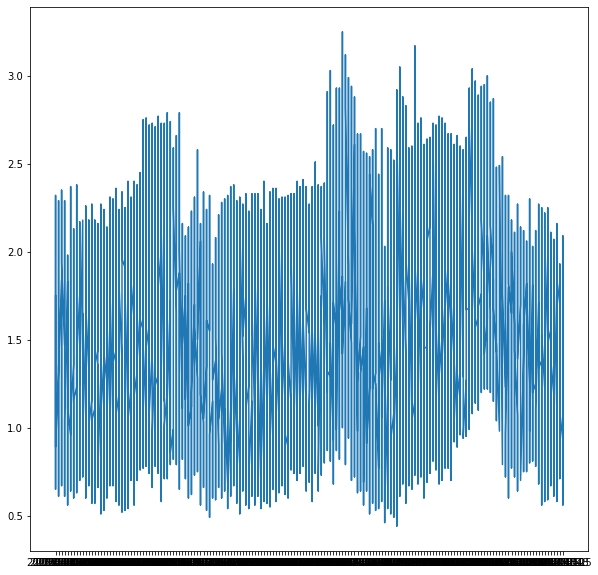

In [10]:
#vis date vs avg price
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

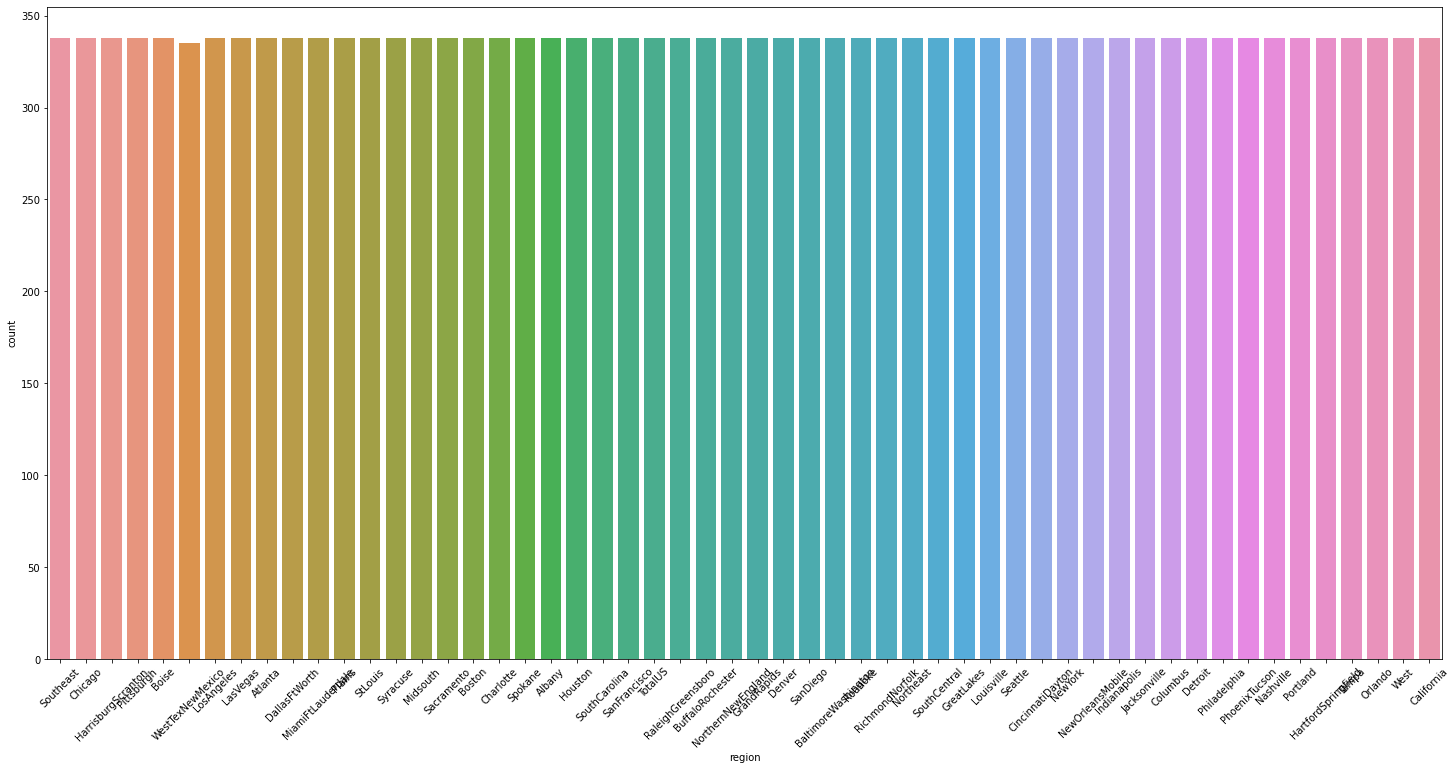

In [22]:
#visusaize the region to check wheteher the data is balanced or not
plt.figure(figsize = (25,12))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='year', ylabel='count'>

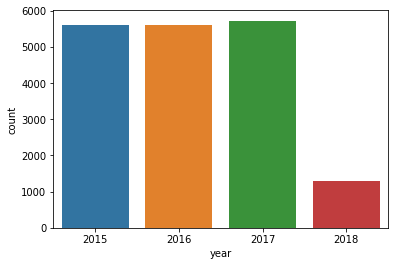

In [23]:
#Sales compared to year
sns.countplot(x = 'year', data = avocado_df)

Fitting the model

In [31]:
#taking data which are needed for facebook prophet model
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [26]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [32]:
avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'}, inplace = True)

C:\Users\H504133\AppData\Local\Temp\ipykernel_13352\937954688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'}, inplace = True)


In [33]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [34]:
#fit the data
m = Prophet()
m.fit(avocado_prophet_df)

16:51:43 - cmdstanpy - INFO - Chain [1] start processing
16:51:56 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
#forecast the future for 1 year
future = m.make_future_dataframe(periods= 365)
forecast = m.predict(future)

In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499563,0.911544,1.871540,1.499563,1.499563,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,0.0,0.0,0.0,1.382064
1,2015-01-11,1.494268,0.902765,1.878988,1.494268,1.494268,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,0.0,0.0,0.0,1.385437
2,2015-01-18,1.488974,0.878789,1.857452,1.488974,1.488974,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,0.0,0.0,0.0,1.380714
3,2015-01-25,1.483679,0.856774,1.820273,1.483679,1.483679,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,0.0,0.0,0.0,1.356774
4,2015-02-01,1.478385,0.802104,1.769427,1.478385,1.478385,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,0.0,0.0,0.0,1.323558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164674,0.539673,1.593349,0.949751,1.375377,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,0.0,0.0,0.0,1.079104
530,2019-03-22,1.163944,0.556327,1.593961,0.948117,1.376649,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,0.0,0.0,0.0,1.080170
531,2019-03-23,1.163213,0.579760,1.585705,0.945978,1.377891,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,0.0,0.0,0.0,1.081515
532,2019-03-24,1.162482,0.540029,1.574668,0.944261,1.378432,-0.079362,-0.079362,-0.079362,-0.079362,-0.079362,-0.079362,0.0,0.0,0.0,1.083119


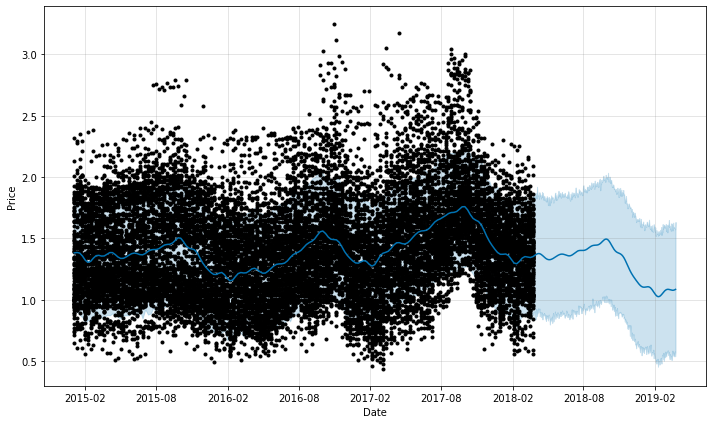

In [37]:
#plotting the the data with future
figure = m.plot(forecast, xlabel = 'Date' , ylabel='Price')

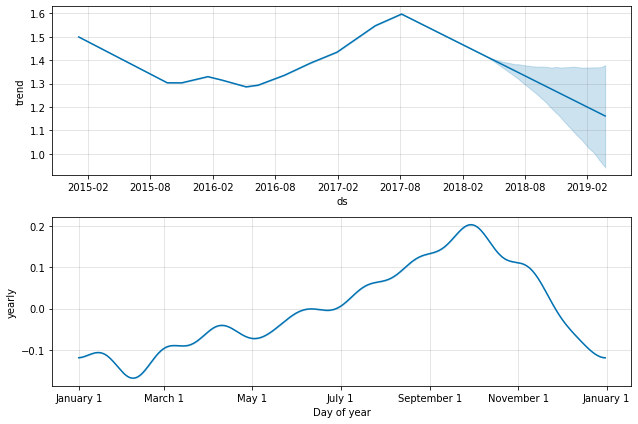

In [38]:
#checking the seasonality
figure = m.plot_components(forecast)